<a href="https://colab.research.google.com/github/PolyOdawo/MyDataScienceRepo/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.nn import Linear
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#liner Regression
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(7.0, requires_grad=True)

def forward(x):
  y = a*x + b
  return y

In [0]:
x= torch.tensor([[2.0], [4.0]])
forward(x)

tensor([[11.],
        [15.]], grad_fn=<AddBackward0>)

In [0]:
#linear regression using the linear class

In [0]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [0]:
x1 = torch.tensor([[3.0], [6.0]])
print(model(x1))

tensor([[1.1044],
        [2.6502]], grad_fn=<AddmmBackward>)


In [0]:
#custom linear regression

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model1 = LR(1, 1)
print(model1.forward(torch.tensor([[1.0], [2.0]])))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [0]:
[w1, b1] = model1.parameters()
def get_params():
  return w1[0][0].item(), b1[0].item() 
print(get_params())

(0.5152631998062134, -0.44137823581695557)


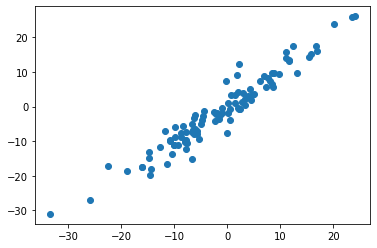

In [0]:
#creating a dataset
x2 = torch.randn(100, 1)*10
y2 = x2 + 3*torch.randn(100, 1)
plt.plot(x2.numpy(), y2.numpy(), 'o')

In [0]:
def plot_fit(title):
  w, b = get_params()
  x = np.array([-30, 30])
  y = w*x + b
  plt.plot(x, y, 'r')
  plt.scatter(x2, y2)
  plt.title = title
  plt.show()

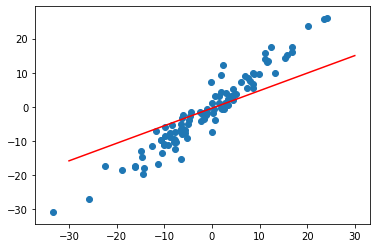

In [0]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr = 0.001)

In [0]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model1.forward(x2)
  loss = criterion(y_pred, y2)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 36.44832992553711
epoch: 1 loss: 25.84706687927246
epoch: 2 loss: 19.274919509887695
epoch: 3 loss: 15.200485229492188
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.10822868347168
epoch: 6 loss: 10.137072563171387
epoch: 7 loss: 9.534791946411133
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.69587516784668
epoch: 12 loss: 8.640158653259277
epoch: 13 loss: 8.605380058288574
epoch: 14 loss: 8.58358097076416
epoch: 15 loss: 8.569830894470215
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551656723022461
epoch: 19 loss: 8.549099922180176
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545924186706543
epoch: 22 loss: 8.54485034942627
epoch: 23 loss: 8.543954849243164
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.54245662689209
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.53991031

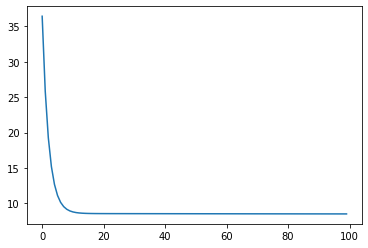

In [0]:
plt.plot(range(epochs), losses)

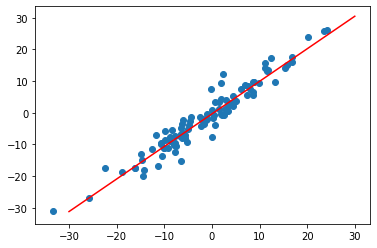

In [0]:
plot_fit("Trained Model")

In [0]:
print(get_params())

(1.0283775329589844, -0.3742034137248993)
